# Persistent Random Walk model simulations for cell motility

This notebook presents a short overview of the most basic baseline for a motility based model: the persistent random walk (PRW). For this, an analysis of the basic properties of the Langevin equation: 

\begin{equation*}
\dfrac{dv}{dt} = -\dfrac{1}{\tau}v + \dfrac{\sqrt{2D}}{\tau}\xi(t),
\end{equation*}

which defines an Ornstein-Uhlenbeck process, is carried out. Properties such as the mean squaredeviation (MSD) and the velocity autocorrelation function (VACF) are presented as well as concepts like the spectral density/power spectrum, and the Wiener-Khintchine theorem (used for the numerical integration of white noise) are also discussed. Although the Langevin equation describes the motion of a Brownian particle with viscous drag, it has also been adapted to model cell motility. 

\begin{equation}
\langle\mathbf{R}^2(t)\rangle = 2nD\tau(e^{-t/\tau} + t/\tau - 1)
\end{equation}

In [2]:
# Starting by importing the necessary modules:
% matplotlib nbagg
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Necesary for 3D plotting

In [89]:
# Define parameters:
dim = 2
numc = 25 # Number of cells to simulate
nums = 256 # Number of simulation steps
dt = 0.5 # Time increment, \Delta t
tau = 100
kBT = 1.0 # set temperatute, k_B T
std = np.sqrt(2*kBT*dt/tau) # calculate std
np.random.seed(0) # Initialize random number generator with a given seed for reproducibility
R = np.zeros([numc, dim]) # Array to store initial cell positions
V = np.zeros([numc, dim]) # Array to store initial cell velocities
W = np.zeros([numc, dim]) # Array to store random forces
Rs = np.zeros([nums, numc, dim]) # Array to store all positions
Vs = np.zeros([nums, numc, dim]) # Array to store all current velocities
Ws = np.zeros([nums, numc, dim]) # Array to store all random variables
time = np.zeros([nums]) # Time array with total steps number

In [90]:
# We perform here the simulation:
# Setting the initial conditions:

for i in range(nums-1):# For each step we calculate the positions and velocities of the cells
    W = std*np.random.randn(numc, dim) # Generate initial random numbers
    R, V = R + V*dt, (1 - dt/tau)*V + W/tau
    Rs[i+1,:,:] = R
    Vs[i+1,:,:] = V
    Ws[i+1,:,:] = W
    time[i] = i*dt

<IPython.core.display.Javascript object>


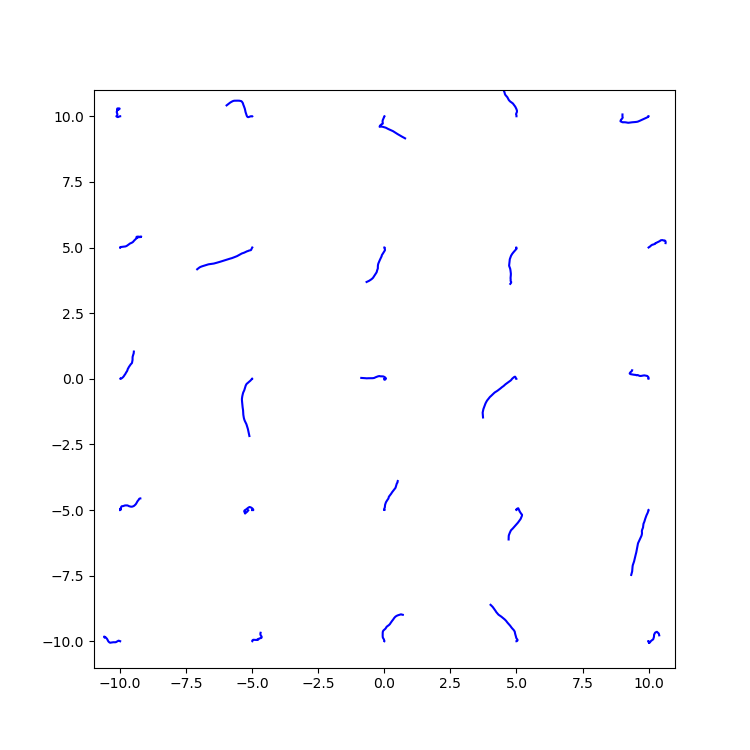

In [91]:
# Translation to initial positions:
R_init = np.zeros([numc, dim]) # Array to store initial cell positions
### This tiny part just defines the initial conditions in a grid for visualization:
count = 0
for r in np.arange(-10, 15, 5):
    for s in np.arange(-10, 15, 5):
        R_init[count,:] = [r,s]
        count += 1
# Plot all the trajectories:
fig, ax = plt.subplots(figsize=(7.5,7.5))
plt.xlim(-11,11)
plt.ylim(-11,11)
for n in range(numc):
    ax.plot(Rs[:,n,0]-R_init[n,0], Rs[:,n,1]-R_init[n,1], 'b-')
    #ax.plot(R_init[n,0],R_init[n,1], 'b*')
plt.show()

Next steps on this part: research about parameters, how they influence the behaviour of the interactions.

In [1]:
# Todays achievement: ploting the velocity with respect to the persistence time for different temperature values:
# Define function that gives back velocity for different parameter of tau:
def velc()